In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./breast-cancer.csv')

In [4]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [11]:
# Converting the Categorical data into numerical

df['diagnosis'] = df['diagnosis'].map({'M':0,'B':1})

In [12]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [13]:
df['diagnosis'].unique()

array([0, 1], dtype=int64)

In [24]:
# dropping id as it is not useful

df.drop('id',axis = 1,inplace = True)

<AxesSubplot:xlabel='texture_mean', ylabel='Count'>

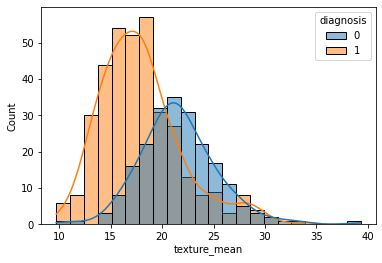

In [34]:
sns.histplot(data=df, x='texture_mean',hue='diagnosis',kde=True)

<AxesSubplot:xlabel='smoothness_mean', ylabel='Count'>

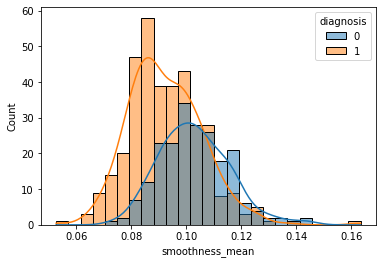

In [35]:
sns.histplot(data=df, x='smoothness_mean',hue='diagnosis',kde=True)

<AxesSubplot:xlabel='area_mean', ylabel='Count'>

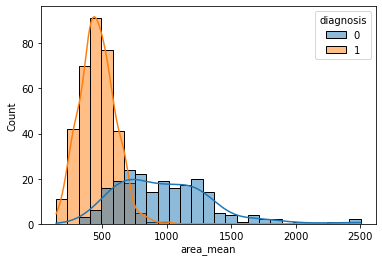

In [39]:
sns.histplot(data=df, x='area_mean',hue='diagnosis',kde=True)

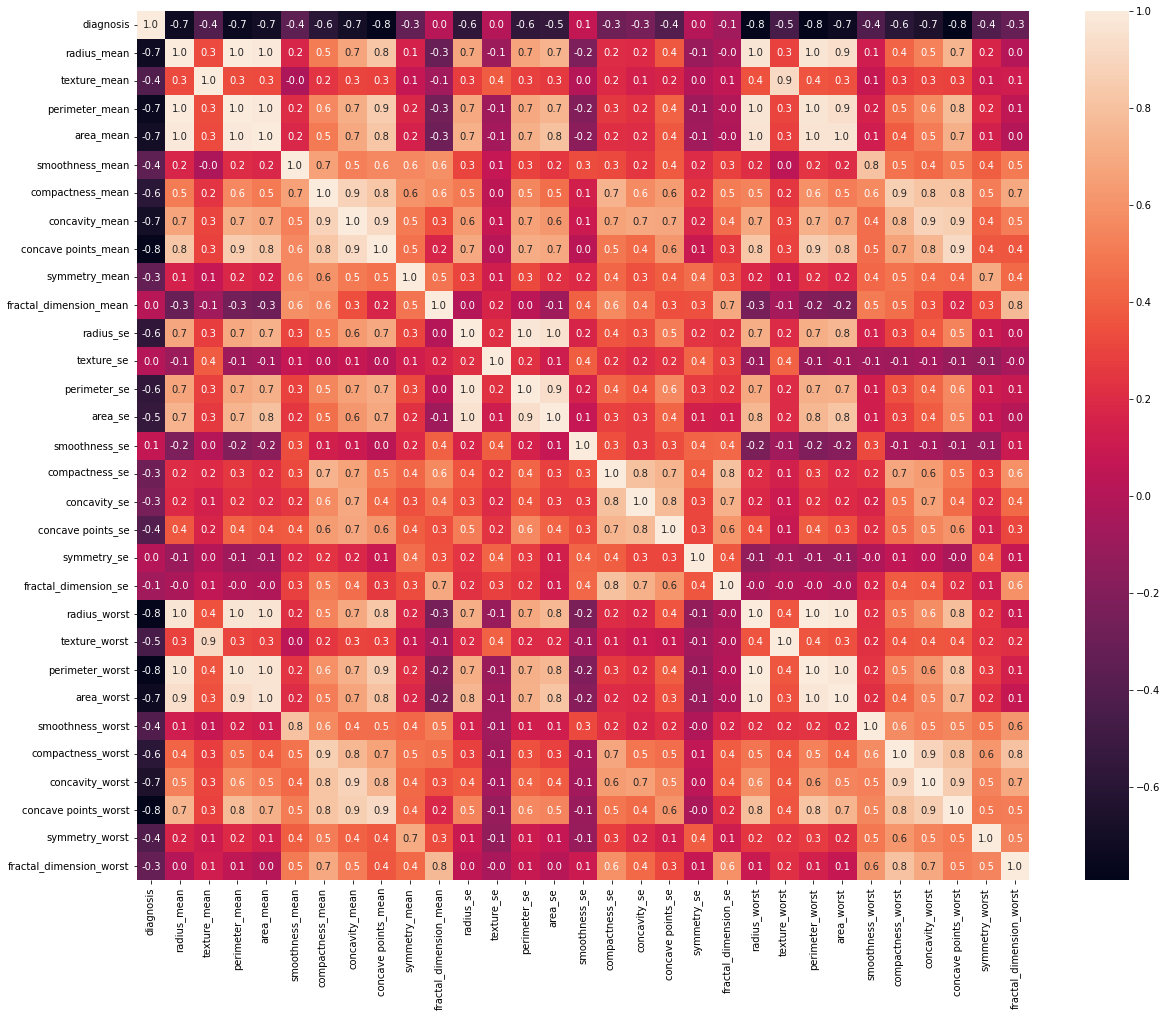

In [45]:
corr = df.corr()
fig = plt.figure(figsize=(20,16))
sns.heatmap(corr,annot=True,fmt=".1f")
plt.show()

## DATA PREPROCESSING

In [50]:

corr_values = abs(corr["diagnosis"])
# Selecting features that has more correlation 
relevant_features = corr_values[corr_values>0.2]
relevant_features = list(relevant_features.index)
relevant_features.remove('diagnosis')

X = df[relevant_features]
y = df['diagnosis'].values

In [51]:
# Transform features by scaling each feature to a given range

from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.489734,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,0.499255,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,1.228676,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,0.326373,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,1.270543,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [56]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [59]:
# model training with Gaussian Naive Bayes

nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)

print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(f'Accuracy score : {accuracy_score(y_test, y_pred_nb)}')

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        63
           1       0.94      0.95      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

[[ 57   6]
 [  5 103]]
Accuracy score : 0.935672514619883


In [60]:
# Model usinf RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_samples=0.75,random_state=42)
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)
print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))
print(f'Accuracy score : {accuracy_score(y_test, y_pred_rfc)}')

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

[[ 59   4]
 [  1 107]]
Accuracy score : 0.9707602339181286
